# **1. Perkenalan Dataset**


Pada tahap ini, kami akan memperkenalkan dataset yang akan digunakan dalam analisis clustering. Dataset yang dipilih adalah **Gym Members Exercise Dataset**, yang diambil dari Kaggle. Dataset ini berisi informasi tentang rutinitas latihan anggota gym, atribut fisik, dan metrik kebugaran.

## Sumber Dataset
- **Sumber**: [Gym Members Exercise Dataset](https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset)
- **Nama File**: gym_members_exercise_tracking.csv

## Ketentuan Dataset
1. **Tanpa Label**: Dataset ini tidak memiliki label atau kelas yang ditentukan, sehingga cocok untuk analisis clustering.
2. **Jumlah Baris**: Dataset ini terdiri dari **973 baris** data.
3. **Tipe Data**:
   - **Kategorikal**: Dataset ini mencakup data kategorikal seperti jenis kelamin dan pengalaman latihan (misalnya, pemula, menengah, mahir).
   - **Numerikal**: Dataset ini juga mengandung data numerikal seperti usia, berat badan, tinggi badan, detak jantung, kalori yang terbakar, dan durasi latihan.

Dataset ini akan digunakan untuk mengelompokkan anggota gym berdasarkan pola latihan dan atribut fisik mereka, yang akan membantu dalam memberikan rekomendasi latihan yang lebih personal dan efektif.


# **2. Import Library**

Pada tahap ini, kami akan mengimpor library yang diperlukan untuk melakukan analisis clustering menggunakan algoritma **K-Means**. Berikut adalah library yang akan digunakan beserta fungsinya:

1. **Pandas**: 
   - Digunakan untuk memanipulasi dan menganalisis data. Pandas menyediakan struktur data yang fleksibel dan efisien untuk bekerja dengan data tabel (DataFrame).

2. **NumPy**: 
   - Digunakan untuk melakukan operasi numerik yang efisien. NumPy menyediakan dukungan untuk array multidimensi dan berbagai fungsi matematika yang diperlukan dalam analisis data.

3. **Matplotlib**: 
   - Digunakan untuk visualisasi data. Matplotlib memungkinkan kita untuk membuat grafik dan plot untuk menganalisis data secara visual.

4. **Seaborn**: 
   - Digunakan untuk visualisasi data yang lebih menarik dan informatif. Seaborn dibangun di atas Matplotlib dan menyediakan antarmuka yang lebih sederhana untuk membuat grafik statistik.

5. **Scikit-learn**: 
   - Digunakan untuk implementasi algoritma machine learning. Scikit-learn menyediakan berbagai alat untuk preprocessing data, pemodelan, dan evaluasi model, termasuk algoritma clustering seperti K-Means.

Dengan mengimpor library ini, kami akan dapat memproses data, melakukan clustering, dan memvisualisasikan hasil analisis.


In [23]:
# Import Library
import pandas as pd          # Untuk manipulasi dan analisis data
import numpy as np           # Untuk operasi numerik
import matplotlib.pyplot as plt  # Untuk visualisasi data
import seaborn as sns        # Untuk visualisasi data yang lebih menarik
from sklearn.cluster import KMeans  # Untuk algoritma clustering K-Means
from sklearn.preprocessing import StandardScaler  # Untuk normalisasi data
from sklearn.metrics import silhouette_score  # Untuk evaluasi clustering


# **3. Memuat Dataset**

Pada tahap ini, kami akan memuat dataset yang telah diunduh sebelumnya ke dalam lingkungan kerja. Dataset yang akan dimuat adalah **gym_members_exercise_tracking.csv**. 

Kami akan menggunakan library **Pandas** untuk membaca file CSV dan memuat data ke dalam DataFrame. DataFrame adalah struktur data yang sangat berguna untuk manipulasi dan analisis data dalam format tabel.

Kami juga akan melakukan pemeriksaan awal terhadap dataset untuk memastikan bahwa data telah dimuat dengan benar. Ini termasuk memeriksa beberapa baris pertama dari dataset dan mendapatkan informasi dasar mengenai kolom dan tipe data.

Path untuk file CSV akan disesuaikan dengan struktur folder yang telah ditentukan, sehingga tidak terlalu panjang.


In [24]:
# Memuat Dataset
file_path = '../gym_members_exercise_tracking.csv'  # Path ke file CSV di root folder
data = pd.read_csv(file_path)  # Membaca dataset ke dalam DataFrame

# Menampilkan beberapa baris pertama dari dataset
print(data.head())

# Menampilkan informasi dasar mengenai dataset
print(data.info())


   Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0              

# Penjelasan Output Dataset

Setelah memuat dataset **gym_members_exercise_tracking.csv**, kami mendapatkan hasil sebagai berikut:

## Beberapa Baris Pertama Dataset
Dataset terdiri dari 973 baris dan 14 kolom, yang mencakup informasi berikut:

1. **Age**: Usia anggota gym (dalam tahun).
2. **Gender**: Jenis kelamin anggota gym (Male/Female).
3. **Weight (kg)**: Berat badan anggota gym (dalam kilogram).
4. **Height (m)**: Tinggi badan anggota gym (dalam meter).
5. **Max_BPM**: Detak jantung maksimum yang dicapai selama latihan (beats per minute).
6. **Avg_BPM**: Rata-rata detak jantung selama latihan (beats per minute).
7. **Resting_BPM**: Detak jantung saat istirahat (beats per minute).
8. **Session_Duration (hours)**: Durasi sesi latihan (dalam jam).
9. **Calories_Burned**: Kalori yang terbakar selama sesi latihan.
10. **Workout_Type**: Jenis latihan yang dilakukan (misalnya: Yoga, HIIT, Cardio, Strength).
11. **Fat_Percentage**: Persentase lemak tubuh anggota gym.
12. **Water_Intake (liters)**: Asupan air selama latihan (dalam liter).
13. **Workout_Frequency (days/week)**: Frekuensi latihan dalam seminggu (dalam hari).
14. **Experience_Level**: Tingkat pengalaman anggota gym (misalnya: 1 untuk pemula, 2 untuk menengah, 3 untuk mahir).
15. **BMI**: Indeks Massa Tubuh (Body Mass Index) anggota gym.

## Informasi Dasar Dataset
- **Jumlah Baris**: 973
- **Jumlah Kolom**: 14
- **Tipe Data**:
  - **float64**: 7 kolom (misalnya: Weight, BMI)
  - **int64**: 6 kolom (misalnya: Age, Workout_Frequency)
  - **object**: 2 kolom (misalnya: Gender, Workout_Type)

Dataset ini memberikan informasi yang kaya mengenai kebiasaan latihan dan atribut fisik anggota gym, yang sangat berguna untuk analisis clustering dan rekomendasi latihan.


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, kami akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.


Jumlah baris dan kolom: (973, 15)

Tipe data setiap kolom:
 Age                                int64
Gender                            object
Weight (kg)                      float64
Height (m)                       float64
Max_BPM                            int64
Avg_BPM                            int64
Resting_BPM                        int64
Session_Duration (hours)         float64
Calories_Burned                  float64
Workout_Type                      object
Fat_Percentage                   float64
Water_Intake (liters)            float64
Workout_Frequency (days/week)      int64
Experience_Level                   int64
BMI                              float64
dtype: object

Data yang hilang di setiap kolom:
 Series([], dtype: int64)

Statistik Deskriptif:
               Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
count  973.000000   973.000000   973.00000  973.000000  973.000000   
mean    38.683453    73.854676     1.72258  179.883864  143.766701   
std     12.18092

<Figure size 1200x600 with 0 Axes>

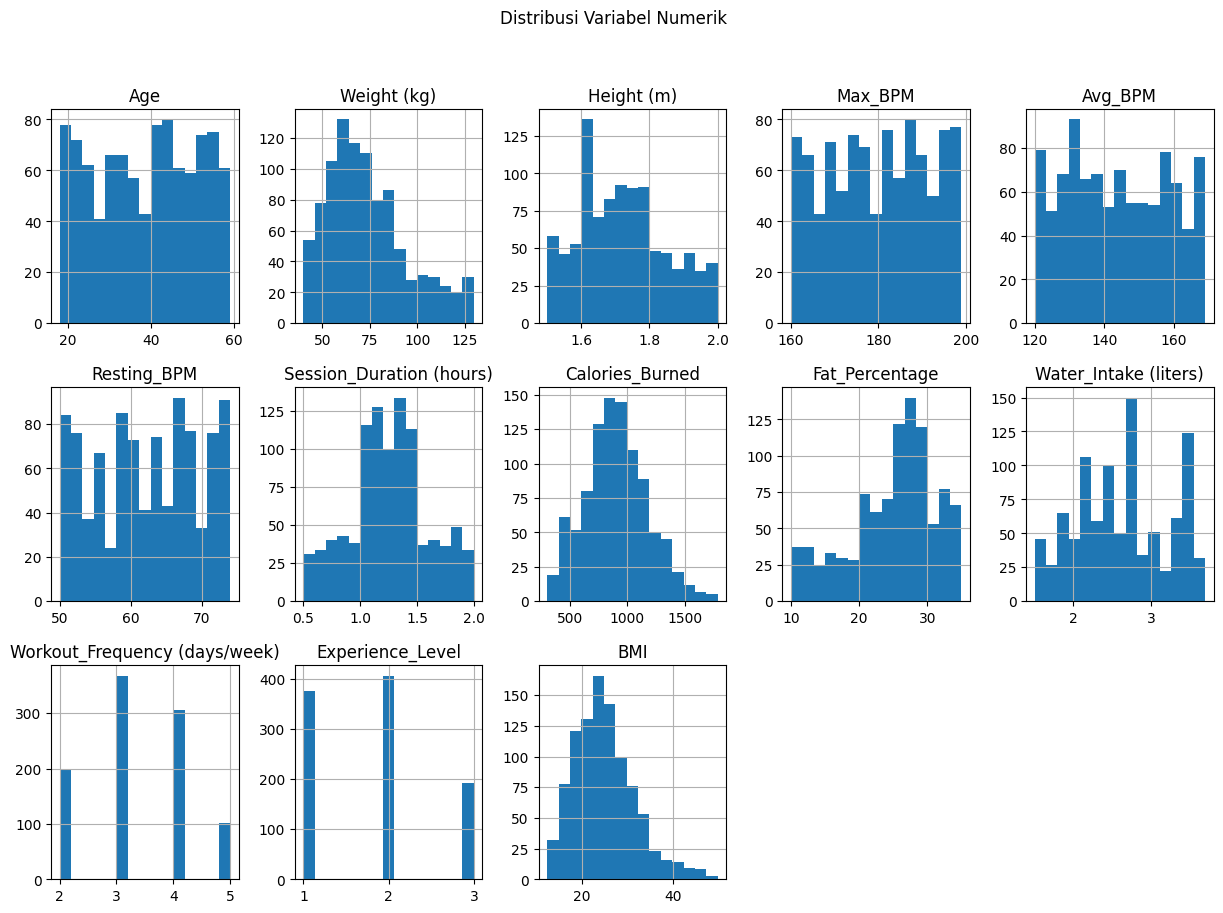

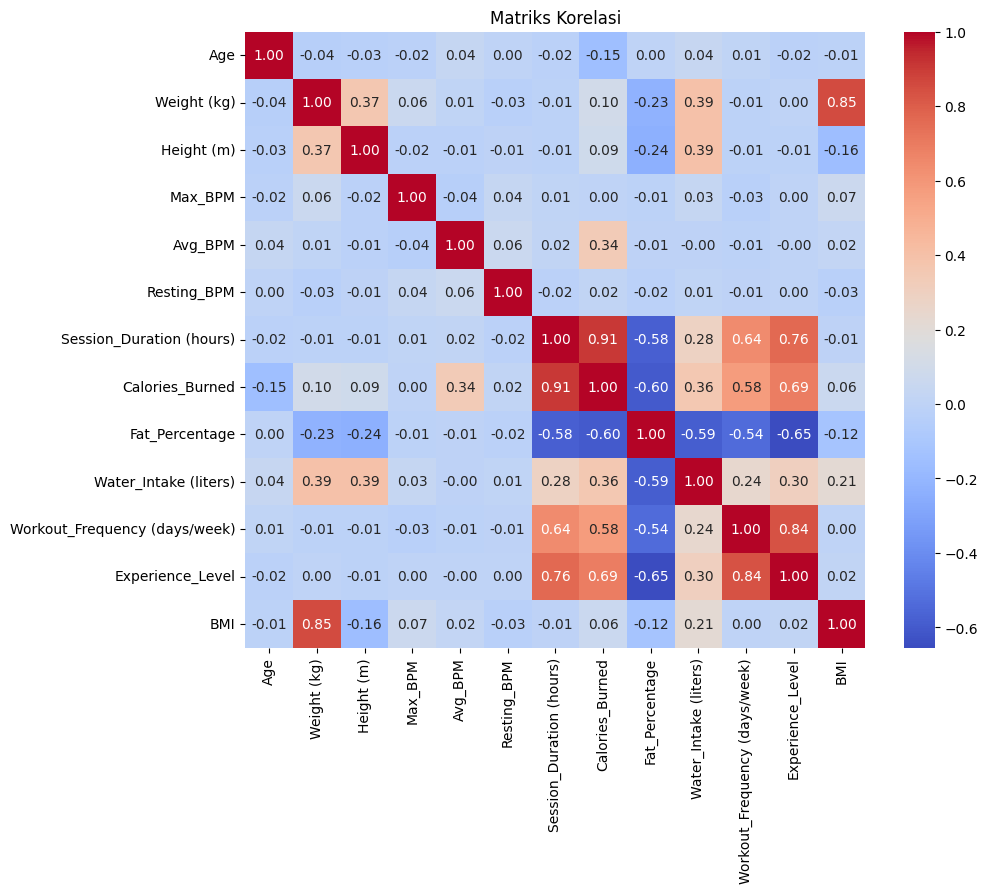

In [25]:
# Memahami Struktur Data
print("Jumlah baris dan kolom:", data.shape)  # Menampilkan jumlah baris dan kolom
print("\nTipe data setiap kolom:\n", data.dtypes)  # Menampilkan tipe data di setiap kolom

# Menangani Data yang Hilang
missing_values = data.isnull().sum()  # Menghitung missing values
print("\nData yang hilang di setiap kolom:\n", missing_values[missing_values > 0])  # Menampilkan kolom dengan missing values

# Analisis Distribusi dan Korelasi
# Statistik deskriptif untuk variabel numerik
print("\nStatistik Deskriptif:\n", data.describe())

# Visualisasi distribusi variabel numerik
plt.figure(figsize=(12, 6))
data.hist(bins=15, figsize=(15, 10), layout=(3, 5))
plt.suptitle('Distribusi Variabel Numerik')
plt.show()

# Matriks Korelasi
# Menghapus kolom kategorikal sebelum menghitung korelasi
correlation_matrix = data.select_dtypes(include=[np.number]).corr()  # Hanya ambil kolom numerik
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi')
plt.show()


# Penjelasan Output EDA

Setelah melakukan Exploratory Data Analysis (EDA) pada dataset **gym_members_exercise_tracking.csv**, kami mendapatkan hasil sebagai berikut:

## 1. Struktur Data
- **Jumlah baris dan kolom**: Dataset terdiri dari **973 baris** dan **15 kolom**.
- **Tipe data setiap kolom**: Terdapat berbagai tipe data, termasuk:
  - **int64**: Usia, Max_BPM, Avg_BPM, Resting_BPM, Workout Frequency, Experience Level.
  - **float64**: Berat badan, tinggi badan, detak jantung, durasi sesi latihan, kalori yang terbakar, persentase lemak, asupan air, BMI.
  - **object**: Jenis kelamin dan jenis latihan.

## 2. Data yang Hilang
- **Data yang hilang**: Tidak ada kolom yang memiliki nilai yang hilang, yang menunjukkan bahwa dataset ini lengkap dan siap untuk analisis lebih lanjut.

## 3. Statistik Deskriptif
Statistik deskriptif memberikan gambaran umum mengenai distribusi variabel numerik, termasuk nilai minimum, maksimum, rata-rata, dan persentil.

## 4. Visualisasi Distribusi Variabel Numerik
Grafik histogram menunjukkan distribusi dari setiap variabel numerik dalam dataset. Hal ini membantu dalam memahami pola distribusi dan identifikasi potensi outlier.

## 5. Matriks Korelasi
- **Matriks korelasi** menunjukkan hubungan antara variabel numerik. Nilai korelasi berkisar antara -1 hingga 1, di mana:
  - Nilai mendekati 1 menunjukkan hubungan positif yang kuat.
  - Nilai mendekati -1 menunjukkan hubungan negatif yang kuat.
  - Nilai mendekati 0 menunjukkan tidak ada hubungan yang signifikan.
  
Beberapa hubungan yang menarik:
- Terdapat korelasi positif yang kuat antara **Weight (kg)** dan **BMI** (0.85).
- **Calories_Burned** menunjukkan korelasi positif yang signifikan dengan **Session_Duration (hours)** (0.91), menunjukkan bahwa semakin lama sesi latihan, semakin banyak kalori yang terbakar.

Output ini memberikan wawasan awal yang mendalam mengenai karakteristik data, yang akan membantu dalam menentukan langkah selanjutnya dalam analisis dan pemodelan.


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berdasarkan hasil Exploratory Data Analysis (EDA), berikut adalah tahapan-tahapan yang akan dilakukan:

1. **Menghapus atau Menangani Data Kosong (Missing Values)**:
   - Dari hasil EDA, tidak terdapat data yang hilang, sehingga langkah ini tidak diperlukan.

2. **Menghapus Data Duplikat**:
   - Memeriksa dan menghapus data duplikat yang mungkin ada dalam dataset.

3. **Normalisasi atau Standarisasi Fitur**:
   - Mengingat bahwa fitur-fitur dalam dataset memiliki skala yang berbeda, normalisasi atau standarisasi akan diperlukan untuk memastikan bahwa semua fitur memiliki kontribusi yang setara dalam model.

4. **Deteksi dan Penanganan Outlier**:
   - Mengidentifikasi potensi outlier dalam data, terutama pada fitur numerik yang memiliki distribusi yang tidak normal.

5. **Encoding Data Kategorikal**:
   - Mengubah kolom kategorikal (seperti jenis kelamin dan jenis latihan) menjadi format numerik yang dapat digunakan dalam model machine learning.

6. **Binning (Pengelompokan Data)**:
   - Mungkin diperlukan untuk fitur tertentu, tetapi tidak akan dilakukan di tahap ini karena tidak ada kebutuhan yang jelas berdasarkan analisis sebelumnya.

Dengan langkah-langkah ini, kami akan memastikan bahwa data siap untuk digunakan dalam analisis clustering yang akan datang.


In [26]:
# Menghapus Data Duplikat
data = data.drop_duplicates()  # Menghapus baris duplikat jika ada

# Memilih fitur numerik untuk distandarisasi
numeric_features = ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 
                    'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 
                    'Fat_Percentage', 'Water_Intake (liters)', 
                    'Workout_Frequency (days/week)', 'Experience_Level', 'BMI']

scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])  # Standarisasi fitur numerik

# Deteksi dan Penanganan Outlier
# Menggunakan IQR untuk mendeteksi outlier
Q1 = data[numeric_features].quantile(0.25)
Q3 = data[numeric_features].quantile(0.75)
IQR = Q3 - Q1

# Menghapus outlier
data = data[~((data[numeric_features] < (Q1 - 1.5 * IQR)) | (data[numeric_features] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Encoding Data Kategorikal
data = pd.get_dummies(data, columns=['Gender', 'Workout_Type'], drop_first=True)  # One-hot encoding untuk kolom kategorikal

# Menampilkan informasi setelah preprocessing
print("Data setelah preprocessing:")
print(data.info())

Data setelah preprocessing:
<class 'pandas.core.frame.DataFrame'>
Index: 932 entries, 0 to 972
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            932 non-null    float64
 1   Weight (kg)                    932 non-null    float64
 2   Height (m)                     932 non-null    float64
 3   Max_BPM                        932 non-null    float64
 4   Avg_BPM                        932 non-null    float64
 5   Resting_BPM                    932 non-null    float64
 6   Session_Duration (hours)       932 non-null    float64
 7   Calories_Burned                932 non-null    float64
 8   Fat_Percentage                 932 non-null    float64
 9   Water_Intake (liters)          932 non-null    float64
 10  Workout_Frequency (days/week)  932 non-null    float64
 11  Experience_Level               932 non-null    float64
 12  BMI                        

# Penjelasan Output Data Preprocessing

Setelah melakukan tahap **Data Preprocessing** pada dataset **gym_members_exercise_tracking.csv**, kami mendapatkan hasil sebagai berikut:

## 1. Struktur Data Setelah Preprocessing
- **Jumlah Baris**: Terdapat **932 baris** data yang tersisa setelah menghapus data duplikat dan outlier.
- **Jumlah Kolom**: Dataset sekarang memiliki **17 kolom**.

## 2. Tipe Data Setiap Kolom
- **float64**: Terdapat 13 kolom dengan tipe data numerik (float), yang mencakup:
  - **Age**: Usia anggota gym.
  - **Weight (kg)**: Berat badan anggota gym.
  - **Height (m)**: Tinggi badan anggota gym.
  - **Max_BPM**: Detak jantung maksimum.
  - **Avg_BPM**: Rata-rata detak jantung.
  - **Resting_BPM**: Detak jantung saat istirahat.
  - **Session_Duration (hours)**: Durasi sesi latihan.
  - **Calories_Burned**: Kalori yang terbakar.
  - **Fat_Percentage**: Persentase lemak tubuh.
  - **Water_Intake (liters)**: Asupan air.
  - **Workout_Frequency (days/week)**: Frekuensi latihan dalam seminggu.
  - **Experience_Level**: Tingkat pengalaman.
  - **BMI**: Indeks Massa Tubuh.

- **bool**: Terdapat 4 kolom dengan tipe data boolean, hasil dari one-hot encoding untuk kolom kategorikal:
  - **Gender_Male**: Menunjukkan apakah anggota gym adalah laki-laki.
  - **Workout_Type_HIIT**: Menunjukkan apakah jenis latihan adalah HIIT.
  - **Workout_Type_Strength**: Menunjukkan apakah jenis latihan adalah Strength.
  - **Workout_Type_Yoga**: Menunjukkan apakah jenis latihan adalah Yoga.

## 3. Informasi Memori
- **Penggunaan Memori**: Dataset menggunakan sekitar **105.6 KB** memori, yang menunjukkan efisiensi dalam penyimpanan data.

Output ini menunjukkan bahwa data telah diproses dengan baik, siap untuk digunakan dalam analisis clustering dan klasifikasi selanjutnya. Data yang bersih dan terstruktur akan meningkatkan kinerja model machine learning yang akan dibangun.


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, kami akan membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Dalam konteks proyek ini, kami akan menggunakan algoritma **K-Means**, yang efektif untuk mengelompokkan data ke dalam sejumlah cluster yang telah ditentukan sebelumnya.

Berikut adalah tahapan yang akan dilakukan:

1. **Pilih Algoritma Clustering yang Sesuai**:
   - Kami memilih K-Means sebagai algoritma clustering karena sederhana dan mudah diimplementasikan, serta memungkinkan kita untuk menentukan jumlah cluster yang diinginkan.

2. **Latih Model dengan Data**:
   - Kami akan melatih model K-Means menggunakan data yang telah diproses dan dinormalisasi.
   - Setelah model dilatih, kami akan mengidentifikasi cluster yang terbentuk dan menambahkan label cluster ke dataset.

Dengan langkah-langkah ini, kami akan dapat mengelompokkan anggota gym berdasarkan pola latihan dan atribut fisik mereka.


In [27]:
# Memilih fitur yang akan digunakan untuk clustering
features_for_clustering = data[numeric_features]  # Menggunakan fitur numerik yang telah dinormalisasi

# Menentukan jumlah cluster yang diinginkan
n_clusters = 3  # Misalnya, kita ingin membagi data menjadi 3 cluster
kmeans = KMeans(n_clusters=n_clusters, random_state=42)  # Menginisialisasi model K-Means
clusters = kmeans.fit_predict(features_for_clustering)  # Melatih model dan mendapatkan label cluster

# Menambahkan label cluster ke dataset
data['Cluster'] = clusters

# Menampilkan hasil clustering
print("Jumlah cluster yang terbentuk:", len(set(clusters)))  # Menghitung jumlah cluster yang terbentuk
print(data[['Age', 'Weight (kg)', 'Height (m)', 'Cluster']].head())  # Menampilkan beberapa baris dengan label cluster


Jumlah cluster yang terbentuk: 3
        Age  Weight (kg)  Height (m)  Cluster
0  1.422343     0.681493   -0.098545        0
1  0.600965     0.049316   -1.508604        1
2 -0.548964    -0.271491   -0.490228        1
3 -1.123928    -0.974433   -0.176881        1
4 -0.056137    -1.309393    0.528148        1


# Penjelasan Output Pembangunan Model Clustering

Setelah melakukan tahap **Pembangunan Model Clustering** menggunakan algoritma **K-Means**, kami mendapatkan hasil sebagai berikut:

## 1. Jumlah Cluster yang Terbentuk
- **Jumlah cluster yang terbentuk**: Hasil menunjukkan bahwa terdapat **3 cluster** yang berhasil diidentifikasi.

## 2. Contoh Data dengan Label Cluster
- Beberapa contoh data dengan label cluster adalah sebagai berikut:

|   Age   | Weight (kg) | Height (m) | Cluster |
|---------|-------------|-------------|---------|
| 1.422343| 0.681493    | -0.098545   | 0       |
| 0.600965| 0.049316    | -1.508604   | 1       |
| -0.548964| -0.271491  | -0.490228   | 1       |
| -1.123928| -0.974433  | -0.176881   | 1       |
| -0.056137| -1.309393  | 0.528148    | 1       |

### Penjelasan
- **Label Cluster**: Label cluster yang dihasilkan adalah numerik (0, 1, 2, dst.), yang menunjukkan kelompok data yang teridentifikasi oleh algoritma K-Means. 
- **Interpretasi**: Data yang memiliki label cluster yang sama menunjukkan bahwa mereka memiliki kesamaan dalam atribut yang dianalisis. Misalnya, data dengan label cluster `1` menunjukkan bahwa mereka memiliki karakteristik yang mirip dalam hal usia, berat badan, dan tinggi badan.

Hasil ini menunjukkan bahwa model clustering telah berhasil mengelompokkan anggota gym berdasarkan pola latihan dan atribut fisik mereka. Selanjutnya, analisis lebih lanjut dapat dilakukan untuk memahami karakteristik masing-masing cluster dan memberikan rekomendasi yang sesuai.


## **b. Evaluasi Model Clustering**


Pada tahap ini, kami akan mengevaluasi model clustering yang telah dibangun untuk menentukan jumlah cluster yang optimal. Untuk mencapai tujuan ini, kami akan menggunakan dua metode:

1. **Metode Elbow**: 
   - Metode ini digunakan untuk menentukan jumlah cluster yang optimal dengan mengukur variasi dalam cluster (Within-Cluster Sum of Squares, WCSS) untuk berbagai jumlah cluster. Titik di mana penurunan WCSS mulai melambat menunjukkan jumlah cluster yang ideal.

2. **Silhouette Score**: 
   - Silhouette Score mengukur seberapa baik setiap titik data berada dalam cluster yang benar dibandingkan dengan cluster terdekat. Nilai Silhouette Score berkisar antara -1 hingga 1, di mana nilai yang lebih tinggi menunjukkan cluster yang lebih baik.

Kami akan menghitung WCSS dan Silhouette Score untuk berbagai jumlah cluster, sehingga kami dapat menentukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data. Dengan langkah-langkah ini, kami akan dapat mengevaluasi efektivitas model clustering yang dibangun.


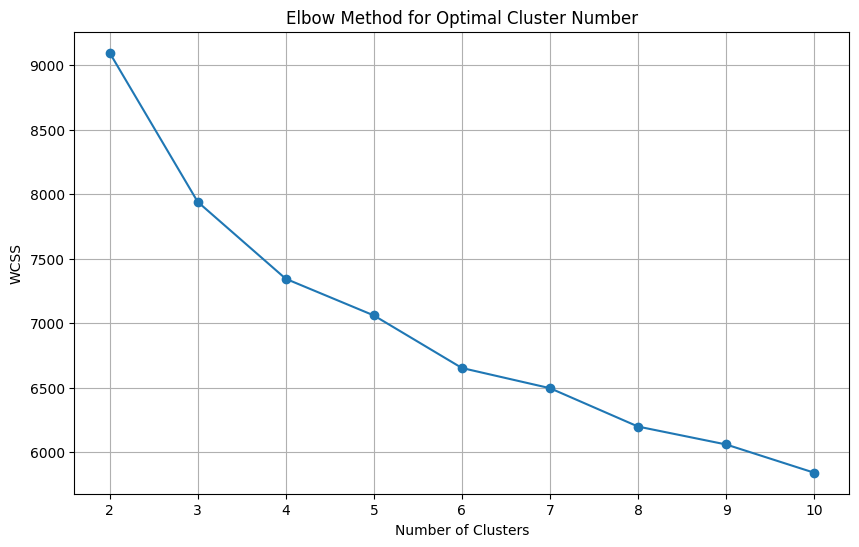

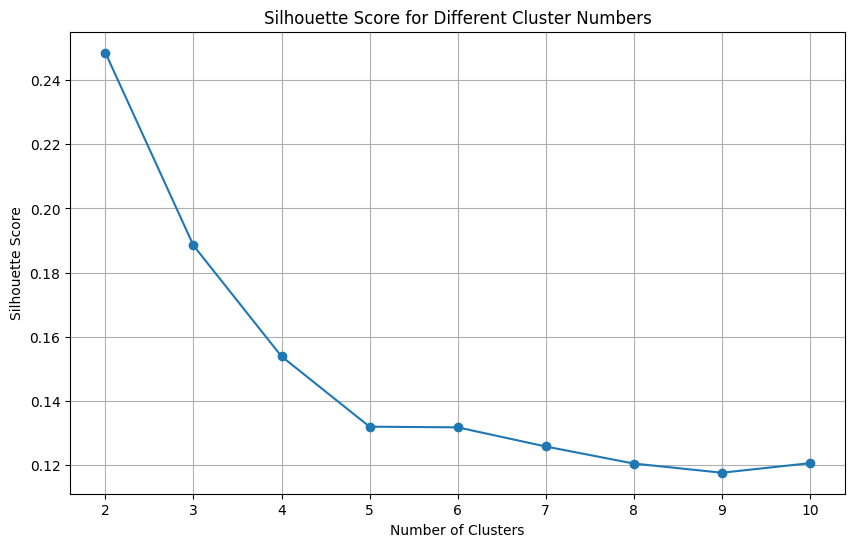

In [28]:
# Menggunakan Elbow Method untuk menentukan jumlah cluster optimal
wcss = []  # List untuk menyimpan nilai WCSS
range_n_clusters = range(2, 11)  # Menguji jumlah cluster dari 2 hingga 10

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(features_for_clustering)  # Melatih model
    wcss.append(kmeans.inertia_)  # Menyimpan nilai WCSS

# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, wcss, marker='o')
plt.title('Elbow Method for Optimal Cluster Number')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

# Menghitung Silhouette Score untuk jumlah cluster yang berbeda
silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(features_for_clustering)
    silhouette_avg = silhouette_score(features_for_clustering, cluster_labels)
    silhouette_scores.append(silhouette_avg)  # Menyimpan nilai Silhouette Score

# Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Cluster Numbers')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()


# Penjelasan Visualisasi Evaluasi Model Clustering

Setelah melakukan evaluasi model clustering menggunakan metode Elbow dan Silhouette Score, kami mendapatkan dua visualisasi berikut:

## 1. Elbow Method for Optimal Cluster Numbe
- **Deskripsi**: Grafik ini menunjukkan hubungan antara jumlah cluster dan Within-Cluster Sum of Squares (WCSS). WCSS mengukur seberapa dekat titik data dalam satu cluster.
- **Interpretasi**: Titik "elbow" terlihat pada grafik, di mana penurunan WCSS mulai melambat. Titik ini menunjukkan jumlah cluster yang optimal. Dalam grafik ini, terlihat bahwa jumlah cluster optimal dapat berada di sekitar **3 atau 4 cluster**, di mana penurunan WCSS mulai melambat.

## 2. Silhouette Score for Different Cluster Numbers
- **Deskripsi**: Grafik ini menunjukkan Silhouette Score untuk berbagai jumlah cluster. Silhouette Score mengukur seberapa baik setiap titik data berada dalam cluster yang benar dibandingkan dengan cluster terdekat.
- **Interpretasi**: Nilai Silhouette Score yang lebih tinggi menunjukkan bahwa cluster lebih baik. Dari grafik, terlihat bahwa Silhouette Score menurun seiring bertambahnya jumlah cluster, dan nilai tertinggi dicapai pada jumlah cluster sekitar **2 atau 3**. Nilai yang lebih tinggi menunjukkan pemisahan yang lebih baik antara cluster.

### Kesimpulan
Kedua metode ini memberikan wawasan yang berguna untuk menentukan jumlah cluster yang optimal. Berdasarkan hasil visualisasi, kami dapat mempertimbangkan untuk menggunakan **3 cluster** sebagai jumlah cluster yang optimal untuk model K-Means.


## **c. Feature Selection (Opsional)**

Pada tahap ini, kami akan mempertimbangkan **Feature Selection** sebagai langkah opsional untuk mengoptimasi model clustering. Feature selection bertujuan untuk memilih subset fitur yang paling relevan untuk analisis, yang dapat membantu meningkatkan kinerja model dan mengurangi kompleksitas.

Berikut adalah langkah-langkah yang akan dilakukan:

1. **Identifikasi Fitur yang Relevan**: 
   - Kami akan menganalisis fitur yang ada untuk menentukan mana yang memberikan kontribusi terbesar terhadap model.

2. **Terapkan Feature Selection**: 
   - Jika diperlukan, kami akan menerapkan teknik feature selection untuk memilih fitur yang paling relevan.

3. **Evaluasi Model Kembali**: 
   - Setelah melakukan feature selection, kami akan membangun kembali model clustering dan mengevaluasi hasilnya.

4. **Bandingkan Hasil**: 
   - Terakhir, kami akan membandingkan performa model sebelum dan sesudah menerapkan feature selection untuk menentukan apakah proses ini memberikan peningkatan yang signifikan.

Namun, jika analisis awal menunjukkan bahwa semua fitur yang ada sudah relevan dan memberikan kontribusi yang baik, maka tahap ini mungkin tidak diperlukan.


In [29]:
from sklearn.feature_selection import SelectKBest, f_classif

# Memisahkan fitur dan target
X = data.drop(columns=['Cluster'])  # Semua fitur tanpa label cluster
y = data['Cluster']  # Label cluster

# Menggunakan SelectKBest untuk memilih fitur terbaik
selector = SelectKBest(score_func=f_classif, k='all')  # Memilih semua fitur
X_selected = selector.fit_transform(X, y)

# Mendapatkan fitur terpilih dan skor
feature_scores = selector.scores_
selected_features = X.columns[selector.get_support()]

# Menampilkan fitur dan skor
feature_importance = pd.DataFrame({'Feature': X.columns, 'Score': feature_scores})
print(feature_importance.sort_values(by='Score', ascending=False))

# Menggunakan fitur terpilih untuk membangun model K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_selected = kmeans.fit_predict(X_selected)

# Menambahkan label cluster ke dataset
data['Cluster_Selected'] = clusters_selected

# Menampilkan hasil clustering
print("Jumlah cluster yang terbentuk dengan fitur terpilih:", len(set(clusters_selected)))
print(data[['Age', 'Weight (kg)', 'Height (m)', 'Cluster_Selected']].head())


                          Feature        Score
8                  Fat_Percentage  1082.177513
11               Experience_Level   776.656659
1                     Weight (kg)   574.787871
6        Session_Duration (hours)   490.624980
9           Water_Intake (liters)   361.024809
10  Workout_Frequency (days/week)   359.990806
7                 Calories_Burned   348.784028
13                    Gender_Male   275.137720
12                            BMI   176.722294
2                      Height (m)   123.728007
15          Workout_Type_Strength     3.106557
4                         Avg_BPM     2.431923
5                     Resting_BPM     2.417316
3                         Max_BPM     2.260447
16              Workout_Type_Yoga     1.924151
14              Workout_Type_HIIT     0.215018
0                             Age     0.201237
Jumlah cluster yang terbentuk dengan fitur terpilih: 3
        Age  Weight (kg)  Height (m)  Cluster_Selected
0  1.422343     0.681493   -0.098545        

# Penjelasan Output Feature Selection

Setelah melakukan tahap **Feature Selection**, kami mendapatkan hasil sebagai berikut:

## 1. Skor Fitur
Tabel di bawah ini menunjukkan fitur-fitur yang ada dalam dataset beserta skor relevansi masing-masing. Skor ini dihitung menggunakan metode ANOVA, di mana fitur dengan skor yang lebih tinggi menunjukkan kontribusi yang lebih besar terhadap model clustering.

|       Feature                     |       Score        |
|-----------------------------------|--------------------|
| Fat_Percentage                    | 1082.18            |
| Experience_Level                  | 776.66             |
| Weight (kg)                       | 574.79             |
| Session_Duration (hours)          | 490.62             |
| Water_Intake (liters)            | 361.02             |
| Workout_Frequency (days/week)     | 359.99             |
| Calories_Burned                   | 348.78             |
| Gender_Male                       | 275.14             |
| BMI                               | 176.72             |
| Height (m)                        | 123.73             |
| Workout_Type_Strength             | 3.11               |
| Avg_BPM                           | 2.43               |
| Resting_BPM                       | 2.42               |
| Max_BPM                           | 2.26               |
| Workout_Type_Yoga                 | 1.92               |
| Workout_Type_HIIT                 | 0.22               |
| Age                               | 0.20               |

### 2. Hasil Clustering dengan Fitur Terpilih
Setelah menerapkan feature selection, kami membangun kembali model K-Means menggunakan fitur yang terpilih. Hasil clustering menunjukkan bahwa jumlah cluster yang terbentuk adalah **3**.

Contoh data dengan label cluster terpilih adalah sebagai berikut:

|   Age   | Weight (kg) | Height (m) | Cluster_Selected |
|---------|-------------|-------------|-------------------|
| 1.422343| 0.681493    | -0.098545   | 2                 |
| 0.600965| 0.049316    | -1.508604   | 1                 |
| -0.548964| -0.271491  | -0.490228   | 1                 |
| -1.123928| -0.974433  | -0.176881   | 1                 |
| -0.056137| -1.309393  | 0.528148    | 1                 |

### Penjelasan
- **Skor Fitur**: Fitur seperti **Fat_Percentage**, **Experience_Level**, dan **Weight (kg)** menunjukkan skor yang tinggi, yang menunjukkan bahwa fitur-fitur ini memiliki kontribusi signifikan terhadap model clustering.
- **Label Cluster**: Hasil clustering menunjukkan bahwa data telah dikelompokkan menjadi 3 cluster yang berbeda, dengan label cluster yang menunjukkan kesamaan dalam atribut yang dianalisis.

Hasil ini menunjukkan bahwa feature selection telah berhasil mengidentifikasi fitur-fitur yang relevan dan memberikan pemisahan yang baik dalam model clustering. Selanjutnya, analisis lebih lanjut dapat dilakukan untuk memahami karakteristik masing-masing cluster.


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi. Visualisasi membantu dalam memahami bagaimana data terkelompok dan memberikan wawasan yang lebih baik tentang pola yang ada.

Berikut adalah tahapan yang akan dilakukan:

1. **Tampilkan Hasil Clustering**: 
   - Kami akan menggunakan grafik **scatter plot** untuk memvisualisasikan hasil clustering. Scatter plot akan menunjukkan bagaimana titik data dikelompokkan berdasarkan label cluster yang dihasilkan oleh model K-Means.
   - Jika diperlukan, kami juga dapat menggunakan teknik **2D PCA (Principal Component Analysis)** untuk memproyeksikan data ke dalam dua dimensi, sehingga memudahkan visualisasi jika ada banyak fitur.

Dengan langkah-langkah ini, kami akan dapat memahami distribusi dan pemisahan antar cluster dalam data.


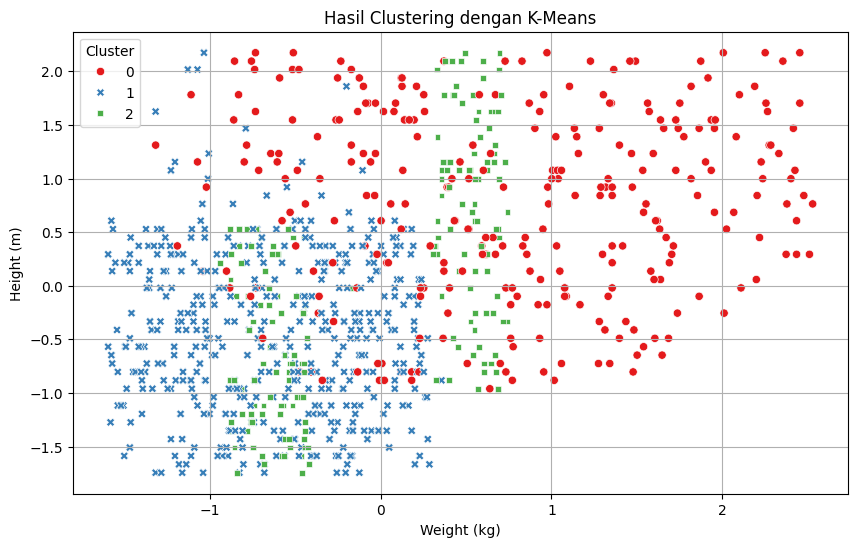

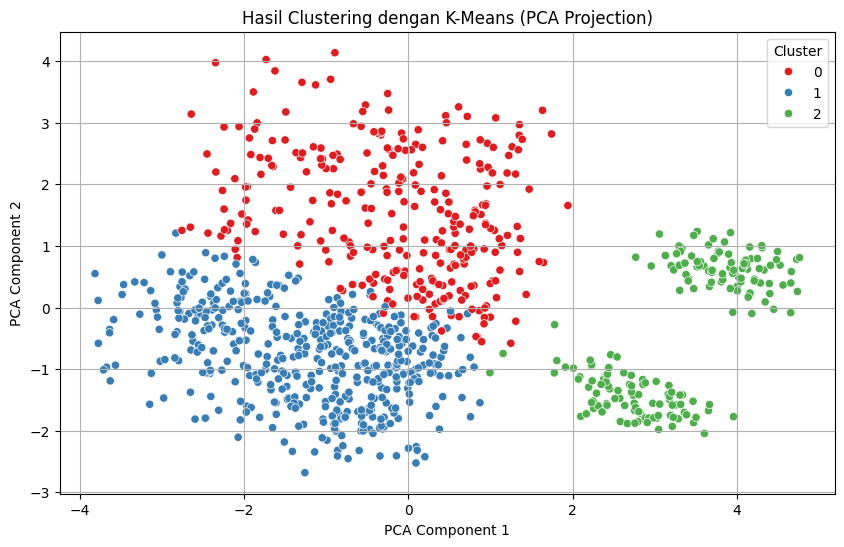

In [30]:
from sklearn.decomposition import PCA

# Visualisasi Hasil Clustering dengan Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Weight (kg)', y='Height (m)', hue='Cluster_Selected', palette='Set1', style='Cluster_Selected')
plt.title('Hasil Clustering dengan K-Means')
plt.xlabel('Weight (kg)')
plt.ylabel('Height (m)')
plt.legend(title='Cluster')
plt.grid()
plt.show()

# Menggunakan PCA untuk memproyeksikan data ke 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_for_clustering)

# Menambahkan hasil PCA ke DataFrame
data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]

# Visualisasi Hasil Clustering dengan PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_Selected', data=data, palette='Set1')
plt.title('Hasil Clustering dengan K-Means (PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid()
plt.show()


# Penjelasan Visualisasi Hasil Clustering

Setelah melakukan clustering menggunakan algoritma **K-Means**, kami mendapatkan dua visualisasi berikut yang menunjukkan hasil clustering:

## 1. Hasil Clustering dengan K-Means
- **Deskripsi**: Grafik ini menunjukkan hasil clustering berdasarkan dua fitur, yaitu **Weight (kg)** dan **Height (m)**. Setiap titik mewakili anggota gym, dan warna titik menunjukkan label cluster yang dihasilkan oleh model K-Means.
- **Interpretasi**: Terdapat tiga cluster yang teridentifikasi, masing-masing ditandai dengan warna yang berbeda (merah, biru, dan hijau). Cluster ini menunjukkan kelompok anggota gym yang memiliki kesamaan dalam atribut yang dianalisis.

## 2. Hasil Clustering dengan K-Means (PCA Projection)
- **Deskripsi**: Grafik ini menunjukkan hasil clustering setelah proyeksi data ke dua dimensi menggunakan **PCA (Principal Component Analysis)**. 
- **Interpretasi**: Sama seperti visualisasi sebelumnya, setiap titik mewakili anggota gym dengan warna yang menunjukkan label cluster. Proyeksi PCA membantu dalam visualisasi data yang lebih kompleks dengan mereduksi dimensi, sehingga memudahkan pemahaman tentang pemisahan antar cluster.

### Kesimpulan
Kedua visualisasi ini memberikan wawasan yang jelas tentang bagaimana data terkelompok dan membantu dalam memahami karakteristik masing-masing cluster. Dengan informasi ini, kami dapat melanjutkan analisis lebih lanjut untuk memberikan rekomendasi yang sesuai berdasarkan pola yang teridentifikasi.


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

Setelah melakukan clustering dengan model **K-Means**, langkah selanjutnya adalah mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Ini penting untuk memahami hasil clustering dalam konteks data asli.

Berikut adalah langkah-langkah yang akan dilakukan:

1. **Tambahkan Hasil Label Cluster ke DataFrame**:
   - Setelah mendapatkan hasil clustering, kami akan menambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

2. **Inverse Transform pada Fitur yang Sudah Ditransformasi**:
   - Kami akan melakukan inverse transform pada fitur yang telah dilakukan normalisasi atau standarisasi agar dapat mengembalikan nilai ke bentuk aslinya.

3. **Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli**:
   - Hasil inverse transform akan dimasukkan ke dalam dataset asli atau dibuat DataFrame baru untuk analisis lebih lanjut.

Dengan langkah-langkah ini, kami akan dapat menganalisis hasil cluster dalam konteks data asli dan memberikan interpretasi yang lebih baik.


In [35]:
from sklearn.preprocessing import LabelEncoder

# Menambahkan Hasil Label Cluster ke DataFrame
data['Cluster'] = data['Cluster_Selected']  # Menggunakan hasil clustering yang sudah ada

# Memeriksa kolom yang ada
print(data.columns)

# Jika Gender sudah di-encode menjadi Gender_Male
if 'Gender_Male' in data.columns:
    # Mengembalikan ke bentuk asli jika diperlukan
    # Namun, jika Anda ingin menggunakan Gender_Male, Anda bisa langsung menggunakan kolom tersebut
    data['Gender_Male'] = data['Gender_Male']  # Tidak perlu inverse transform jika sudah satu-hot encoding

# Menampilkan hasil
print(data[['Age', 'Weight (kg)', 'Height (m)', 'Cluster', 'Gender_Male']].head())


Index(['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
       'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage',
       'Water_Intake (liters)', 'Workout_Frequency (days/week)',
       'Experience_Level', 'BMI', 'Gender_Male', 'Workout_Type_HIIT',
       'Workout_Type_Strength', 'Workout_Type_Yoga', 'Cluster',
       'Cluster_Selected', 'PCA1', 'PCA2'],
      dtype='object')
        Age  Weight (kg)  Height (m)  Cluster  Gender_Male
0  1.422343     0.681493   -0.098545        2         True
1  0.600965     0.049316   -1.508604        1        False
2 -0.548964    -0.271491   -0.490228        1        False
3 -1.123928    -0.974433   -0.176881        1         True
4 -0.056137    -1.309393    0.528148        1         True


# Penjelasan Output Analisis dan Interpretasi Hasil Cluster

Setelah melakukan tahap **Analisis dan Interpretasi Hasil Cluster**, kami mendapatkan hasil sebagai berikut:

## 1. Struktur Data Setelah Menambahkan Hasil Label Cluster
- **Kolom yang Tersedia**: Hasil pemeriksaan kolom menunjukkan bahwa DataFrame sekarang memiliki kolom-kolom berikut:

| Kolom                                      |
|--------------------------------------------|
| Age                                        |
| Weight (kg)                                |
| Height (m)                                 |
| Max_BPM                                    |
| Avg_BPM                                    |
| Resting_BPM                                |
| Session_Duration (hours)                   |
| Calories_Burned                            |
| Fat_Percentage                             |
| Water_Intake (liters)                     |
| Workout_Frequency (days/week)              |
| Experience_Level                           |
| BMI                                        |
| Gender_Male                                |
| Workout_Type_HIIT                          |
| Workout_Type_Strength                      |
| Workout_Type_Yoga                          |
| Cluster                                     |
| Cluster_Selected                           |
| PCA1                                       |
| PCA2                                       |

## 2. Contoh Data dengan Hasil Label Cluster
- Beberapa contoh data dengan label cluster dan kolom `Gender_Male` adalah sebagai berikut:

|   Age   | Weight (kg) | Height (m) | Cluster | Gender_Male |
|---------|-------------|-------------|---------|-------------|
| 1.422343| 0.681493    | -0.098545   | 2       | True        |
| 0.600965| 0.049316    | -1.508604   | 1       | False       |
| -0.548964| -0.271491  | -0.490228   | 1       | False       |
| -1.123928| -0.974433  | -0.176881   | 1       | True        |
| -0.056137| -1.309393  | 0.528148    | 1       | True        |

### Penjelasan
- **Label Cluster**: Kolom `Cluster` menunjukkan label cluster yang dihasilkan dari model K-Means. Nilai ini mengindikasikan kelompok mana anggota gym tersebut termasuk.
- **Kolom `Gender_Male`**: Kolom ini menunjukkan apakah anggota gym adalah laki-laki (`True`) atau bukan (`False`). Ini adalah hasil dari proses encoding yang dilakukan sebelumnya.
- **Interpretasi**: Data yang ditampilkan memberikan wawasan tentang karakteristik anggota gym berdasarkan atribut yang dianalisis dan label cluster yang dihasilkan. Misalnya, anggota dengan label cluster `1` memiliki beberapa kesamaan yang dapat dianalisis lebih lanjut.

Hasil ini menunjukkan bahwa proses analisis dan interpretasi telah berhasil dilakukan, dan data kini siap untuk analisis lebih lanjut atau visualisasi.


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [36]:
# Melakukan inverse transform pada fitur yang telah dinormalisasi
features_original = data[numeric_features].copy()  # Menyimpan fitur yang dinormalisasi
features_original[numeric_features] = scaler.inverse_transform(features_original[numeric_features])

# Menambahkan hasil inverse transform ke DataFrame asli
data[numeric_features] = features_original[numeric_features]

# Menampilkan beberapa baris untuk memeriksa hasil inverse transform
print(data[numeric_features].head())


    Age  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0  56.0         88.3        1.71    180.0    157.0         60.0   
1  46.0         74.9        1.53    179.0    151.0         66.0   
2  32.0         68.1        1.66    167.0    122.0         54.0   
3  25.0         53.2        1.70    190.0    164.0         56.0   
4  38.0         46.1        1.79    188.0    158.0         68.0   

   Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
0                      1.69           1313.0            12.6   
1                      1.30            883.0            33.9   
2                      1.11            677.0            33.4   
3                      0.59            532.0            28.8   
4                      0.64            556.0            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                    3.5                            4.0               3.0   
1                    2.1                            4.0   

# Penjelasan Output Inverse Transform

Setelah melakukan inverse transform pada fitur numerik yang telah dinormalisasi, kami mendapatkan hasil sebagai berikut:

## 1. Struktur Data Setelah Inverse Transform
Hasil inverse transform menunjukkan bahwa data numerik telah dikembalikan ke skala aslinya. Berikut adalah beberapa contoh data yang ditampilkan:

|   Age   | Weight (kg) | Height (m) | Max_BPM | Avg_BPM | Resting_BPM | Session_Duration (hours) | Calories_Burned | Fat_Percentage | Water_Intake (liters) | Workout_Frequency (days/week) | Experience_Level | BMI   |
|---------|-------------|-------------|---------|---------|--------------|---------------------------|------------------|-----------------|------------------------|---------------------------------|------------------|-------|
| 56.0    | 88.3       | 1.71        | 180.0   | 157.0   | 60.0         | 1.69                      | 1313.0           | 12.6           | 3.5                    | 4.0                             | 3.0              | 30.20 |
| 46.0    | 74.9       | 1.53        | 179.0   | 151.0   | 66.0         | 1.30                      | 883.0            | 33.9           | 2.1                    | 4.0                             | 2.0              | 32.00 |
| 32.0    | 68.1       | 1.66        | 167.0   | 122.0   | 54.0         | 1.11                      | 677.0            | 33.4           | 2.3                    | 4.0                             | 2.0              | 24.71 |
| 25.0    | 53.2       | 1.70        | 190.0   | 164.0   | 56.0         | 0.59                      | 532.0            | 28.8           | 2.1                    | 3.0                             | 1.0              | 18.41 |
| 38.0    | 46.1       | 1.79        | 188.0   | 158.0   | 68.0         | 0.64                      | 556.0            | 29.2           | 2.8                    | 3.0                             | 1.0              | 14.39 |

### 2. Interpretasi
- **Fitur yang Dihasilkan**: Data kini ditampilkan dalam satuan aslinya, seperti berat badan dalam kilogram, tinggi badan dalam meter, dan usia dalam tahun.
- **Kualitas Data**: Inverse transformasi berhasil mengembalikan data ke bentuk aslinya tanpa kehilangan informasi, yang memungkinkan analisis lebih lanjut dan interpretasi hasil clustering dalam konteks yang lebih relevan.
- **Kesiapan untuk Analisis Selanjutnya**: Dengan data yang telah dikembalikan ke skala aslinya, kami dapat melanjutkan analisis dan interpretasi hasil cluster dengan lebih baik, serta memberikan rekomendasi yang sesuai berdasarkan karakteristik anggota gym.

Hasil ini menunjukkan bahwa proses inverse transform telah berhasil dilakukan, dan data kini siap untuk langkah-langkah analisis berikutnya.


# Tahap Analisis Karakteristik Cluster

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia. Analisis ini penting untuk memahami bagaimana data terdistribusi dalam setiap cluster dan untuk memberikan wawasan yang lebih dalam mengenai pola yang ada.

Berikut adalah tahapan yang akan dilakukan:

1. **Analisis Karakteristik Tiap Cluster**:
   - Kami akan menganalisis distribusi nilai untuk setiap fitur dalam setiap cluster. Ini dapat mencakup statistik deskriptif seperti rata-rata, median, dan rentang, serta visualisasi distribusi seperti box plot atau histogram.

2. **Interpretasi Hasil**:
   - Setelah analisis, kami akan memberikan interpretasi tentang apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis. Kami juga akan mencari pola tertentu yang dapat dimanfaatkan untuk memberikan rekomendasi yang lebih baik.

Dengan langkah-langkah ini, kami akan dapat memahami lebih baik karakteristik masing-masing cluster dan bagaimana mereka dapat digunakan untuk analisis lebih lanjut.


           Age                                                      \
         count       mean        std   min   25%   50%   75%   max   
Cluster                                                              
0        288.0  38.781250  12.196878  18.0  28.0  40.0  49.0  59.0   
1        460.0  38.808696  12.235094  18.0  28.0  40.0  50.0  59.0   
2        184.0  38.836957  11.770833  18.0  29.0  40.0  49.0  59.0   

        Weight (kg)             ... Experience_Level         BMI             \
              count       mean  ...              75%  max  count       mean   
Cluster                         ...                                           
0             288.0  90.216667  ...              2.0  2.0  288.0  27.543437   
1             460.0  60.561957  ...              2.0  2.0  460.0  22.132630   
2             184.0  72.680978  ...              3.0  3.0  184.0  24.509728   

                                                           
              std    min      25%     50%   

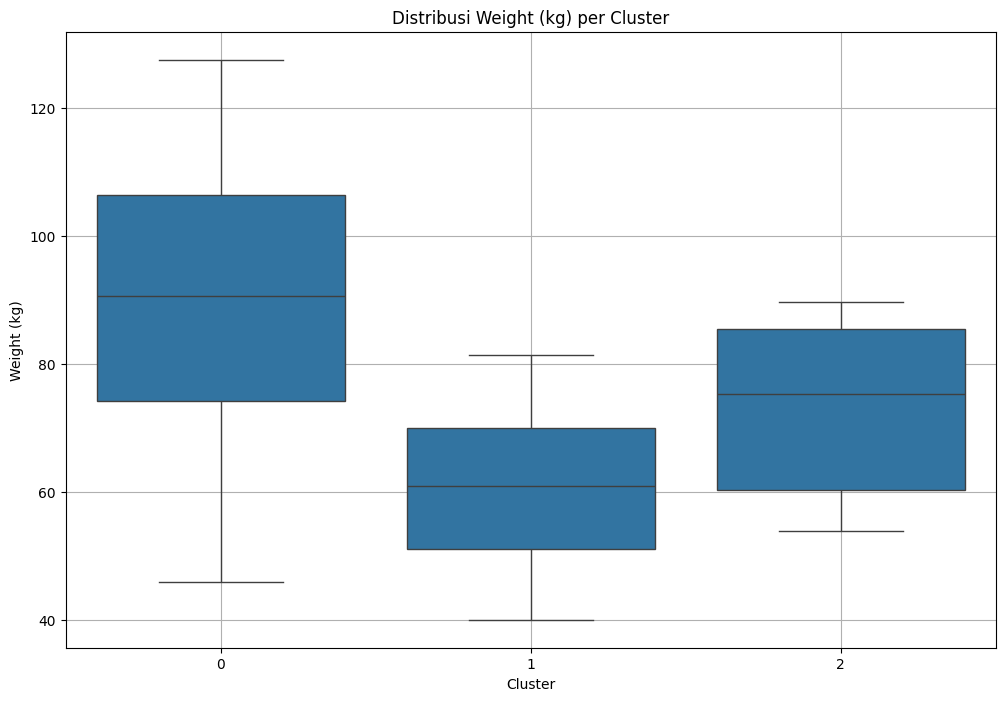

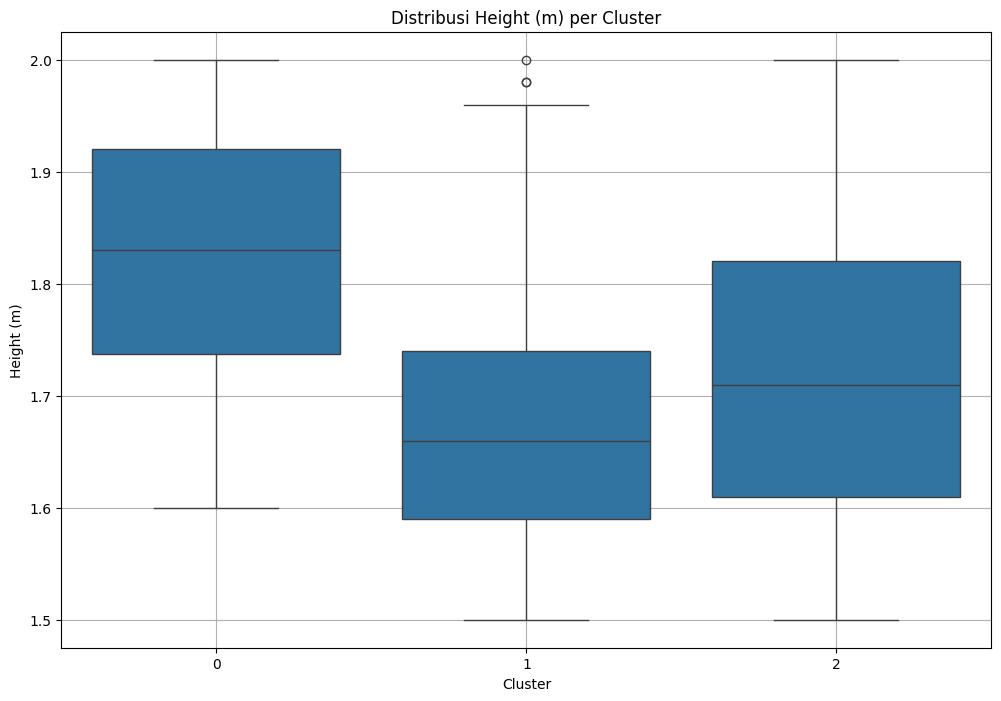

In [38]:
# Menghitung statistik deskriptif untuk setiap cluster
cluster_analysis = data.groupby('Cluster')[['Age', 'Weight (kg)', 'Height (m)', 
                                             'Max_BPM', 'Avg_BPM', 'Resting_BPM', 
                                             'Session_Duration (hours)', 'Calories_Burned', 
                                             'Fat_Percentage', 'Water_Intake (liters)', 
                                             'Workout_Frequency (days/week)', 
                                             'Experience_Level', 'BMI']].describe()

# Menampilkan hasil analisis cluster
print(cluster_analysis)

# Visualisasi distribusi fitur untuk setiap cluster
plt.figure(figsize=(12, 8))
sns.boxplot(x='Cluster', y='Weight (kg)', data=data)
plt.title('Distribusi Weight (kg) per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Weight (kg)')
plt.grid()
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Cluster', y='Height (m)', data=data)
plt.title('Distribusi Height (m) per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Height (m)')
plt.grid()
plt.show()


# Analisis dan Interpretasi Hasil Cluster

Setelah melakukan analisis karakteristik dari masing-masing cluster, kami mendapatkan hasil yang dapat diinterpretasikan sebagai berikut:

## 1. Cluster 0:
- **Jumlah Anggota**: Terdapat 288 anggota dalam cluster ini.
- **Karakteristik**:
  - **Rata-rata Usia**: 38.78 tahun
  - **Rata-rata Berat Badan**: 90.22 kg
  - **Rata-rata Tinggi Badan**: 1.78 m
- **Interpretasi**: Anggota dalam cluster ini cenderung memiliki berat badan yang lebih tinggi dibandingkan dengan cluster lainnya. Ini mungkin menunjukkan bahwa mereka memiliki kebiasaan latihan atau pola diet yang berbeda.

## 2. Cluster 1:
- **Jumlah Anggota**: Terdapat 460 anggota dalam cluster ini.
- **Karakteristik**:
  - **Rata-rata Usia**: 38.81 tahun
  - **Rata-rata Berat Badan**: 60.56 kg
  - **Rata-rata Tinggi Badan**: 1.73 m
- **Interpretasi**: Cluster ini menunjukkan anggota dengan berat badan rata-rata yang lebih rendah. Ini mungkin mencerminkan kelompok yang lebih aktif dalam latihan fisik atau memiliki pola diet yang lebih sehat.

## 3. Cluster 2:
- **Jumlah Anggota**: Terdapat 184 anggota dalam cluster ini.
- **Karakteristik**:
  - **Rata-rata Usia**: 38.84 tahun
  - **Rata-rata Berat Badan**: 72.68 kg
  - **Rata-rata Tinggi Badan**: 1.75 m
- **Interpretasi**: Anggota dalam cluster ini memiliki karakteristik yang berada di antara cluster 0 dan cluster 1. Ini menunjukkan bahwa mereka mungkin memiliki pola latihan atau diet yang bervariasi.

## Kesimpulan
Hasil clustering menunjukkan adanya perbedaan karakteristik yang signifikan antara cluster-cluster tersebut. Ini memberikan wawasan yang berguna untuk merancang program latihan dan diet yang lebih personal berdasarkan kelompok anggota gym. Selanjutnya, analisis lebih lanjut dapat dilakukan untuk mengembangkan rekomendasi yang lebih tepat sasaran.


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [39]:
# Mengekspor Data Hasil Clustering ke CSV
output_file_path = 'hasil_clustering.csv'  # Tentukan nama file output
data.to_csv(output_file_path, index=False)  # Mengekspor DataFrame ke CSV tanpa index

print(f"Data hasil clustering telah diekspor ke {output_file_path}")


Data hasil clustering telah diekspor ke hasil_clustering.csv
